### 1.a. 	Examine and derive insights from the provided data in the file named "bank-additional-full.csv" using Python


In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.metrics.pairwise import cosine_similarity
import os

### i.	Find the key characteristics of the dataset (Size, Datatypes, Summary)

In [3]:
bank_df = pd.read_csv("D:/PYTHON/DATA SCIENCE/DATA/bank-additional-full.csv",sep = ';')

In [4]:
bank_df.size

864948

In [5]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
bank_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### ii.	What is the overall conversion rate for the entire dataset?

In [11]:
conversion_count = bank_df['y'].value_counts()

In [13]:
conversion_rate = conversion_count.get('yes', 0) / len(bank_df) * 100
conversion_rate

np.float64(11.265417111780131)

### iii.How does the conversion rate vary across different education levels?

In [15]:
conversion_by_education = bank_df.groupby('education')['y'].value_counts(normalize=True).unstack()

In [16]:
conversion_by_education['conversion_rate'] = conversion_by_education['yes'] * 100
conversion_by_education[['conversion_rate']]

y,conversion_rate
education,
basic.4y,10.249042
basic.6y,8.202443
basic.9y,7.824648
high.school,10.835523
illiterate,22.222222
professional.course,11.348465
university.degree,13.724523
unknown,14.500289


### iv.	Are there any trends or patterns in conversion rates among individuals with different educational backgrounds? (Hint: Use Charts)

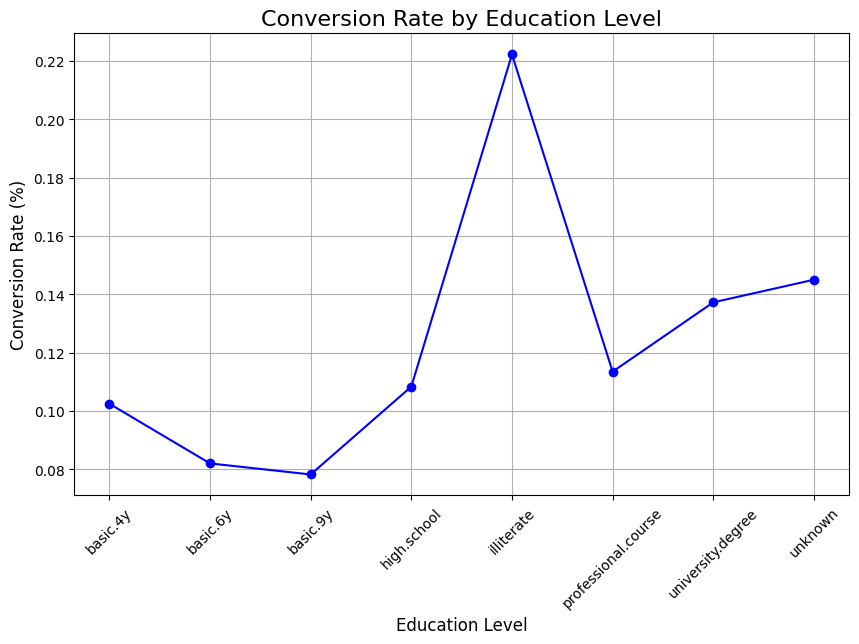

In [21]:
conversion_by_education = bank_df.groupby('education')['y'].apply(lambda x: (x == 'yes').mean())
plt.figure(figsize=(10,6))
conversion_by_education.plot(kind='line', marker='o', color='blue')
plt.title("Conversion Rate by Education Level", fontsize=16)
plt.xlabel("Education Level", fontsize=12)
plt.ylabel("Conversion Rate (%)", fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)  
plt.show()


In [67]:
conversion_by_job = bank_df.groupby('job')['y'].value_counts(normalize=True).unstack()

In [68]:

conversion_by_job['conversion_rate'] = conversion_by_job['yes'] * 100
conversion_by_job[['conversion_rate']]


y,conversion_rate
job,
admin.,12.972558
blue-collar,6.894316
entrepreneur,8.516484
housemaid,10.000000
management,11.217510
retired,25.232558
self-employed,10.485574
services,8.138070
student,31.428571


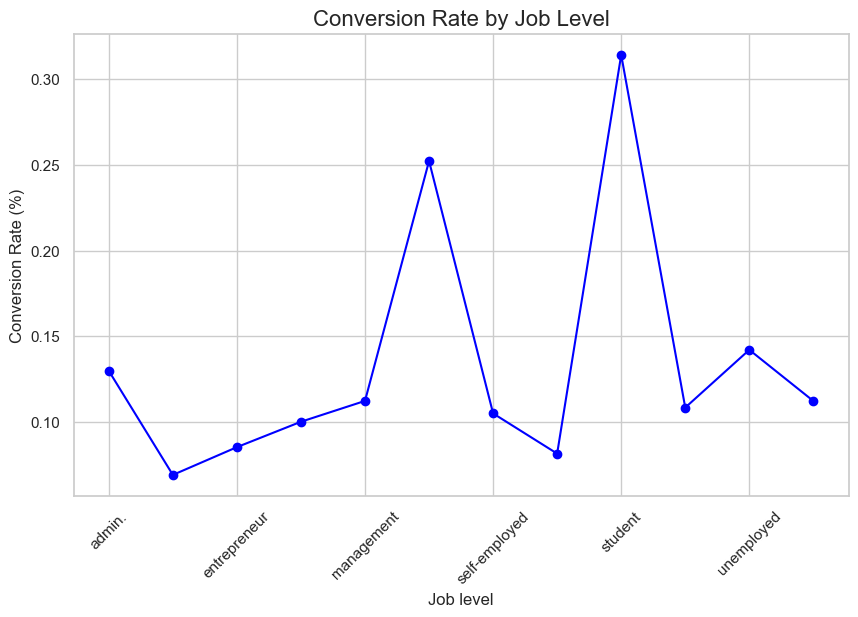

In [64]:
conversion_by_job  = bank_df.groupby('job')['y'].apply(lambda x: (x == 'yes').mean())
plt.figure(figsize=(10,6))
conversion_by_job .plot(kind='line', marker='o', color='blue')
plt.title("Conversion Rate by Job Level", fontsize=16)
plt.xlabel("Job level", fontsize=12)
plt.ylabel("Conversion Rate (%)", fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)  
plt.show()

###      3. a.  How would you approach the encoding of multiple categorical variables ('job,' 'marital,'   'education,' 'default', ' housing,' 'loan,' 'contact,' 'month') within the dataset named 'bank_full.csv' to construct a decision tree model in R? Provide a demonstration of   various methods for encoding categorical variables


In [70]:
df = pd.read_csv("D:/PYTHON/DATA SCIENCE/DATA/bank-full.csv")

In [25]:
df['conversion']= df['Target'].apply (lambda x:0 if x == 'no' else 1)

In [27]:
# One-hot encoding
df_encoded = pd.get_dummies(df, columns=['job', 'marital', 'education','default','housing', 'loan','contact','month'], drop_first=True)


In [29]:
dt_model = tree.DecisionTreeClassifier(max_depth=4)

In [30]:
dt_model

DecisionTreeClassifier(max_depth=4)

In [72]:
encoded_df = pd.get_dummies(df,columns=['job','marital'],dtype=int)
full_df =  pd.concat([df,encoded_df],axis=1)
df=full_df.loc[:,~full_df.columns.duplicated()]
df['housing'] = df['housing'].apply(lambda x:0 if x == 'no'
                                 else 1)

df['loan'] = df['loan'].apply(lambda x:0 if x == 'no'
                                 else 1)

df['education'] = df['education'].apply(lambda x:0 if x == 'no'
                                 else 1)

df['default'] = df['default'].apply(lambda x:0 if x == 'no'
                                 else 1)

df['contact'] = df['contact'].apply(lambda x:0 if x == 'no'
                                 else 1)
df['month'] = df['month'].apply(lambda x:0 if x == 'no'
                                 else 1)
encoded_df

C:\Users\AJITH N\AppData\Local\Temp\ipykernel_9008\322494534.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['housing'] = df['housing'].apply(lambda x:0 if x == 'no'
C:\Users\AJITH N\AppData\Local\Temp\ipykernel_9008\322494534.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan'] = df['loan'].apply(lambda x:0 if x == 'no'
C:\Users\AJITH N\AppData\Local\Temp\ipykernel_9008\322494534.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,1,0,2143,1,0,1,5,1,261,...,0,0,0,0,0,0,0,0,1,0
1,44,1,0,29,1,0,1,5,1,151,...,0,0,0,0,1,0,0,0,0,1
2,33,1,0,2,1,1,1,5,1,76,...,0,0,0,0,0,0,0,0,1,0
3,47,1,0,1506,1,0,1,5,1,92,...,0,0,0,0,0,0,0,0,1,0
4,33,1,0,1,0,0,1,5,1,198,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,0,825,0,0,1,17,1,977,...,0,0,0,0,1,0,0,0,1,0
45207,71,1,0,1729,0,0,1,17,1,456,...,1,0,0,0,0,0,0,1,0,0
45208,72,1,0,5715,0,0,1,17,1,1127,...,1,0,0,0,0,0,0,0,1,0
45209,57,1,0,668,0,0,1,17,1,508,...,0,0,0,0,0,0,0,0,1,0


In [32]:
list(df.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'Target',
 'conversion',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single']

In [33]:
response_var = 'conversion'
features = ['age',  'balance', 'housing', 'campaign', 
       'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single']

In [34]:

dt_model.fit(df[features],df[response_var])

DecisionTreeClassifier(max_depth=4)

In [35]:
dt_model.classes_

array([0, 1])

In [36]:
dt_model.feature_importances_


array([0.22958146, 0.03357839, 0.39439427, 0.01104479, 0.30370049,
       0.        , 0.00785975, 0.        , 0.        , 0.        ,
       0.        , 0.00235943, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0061807 , 0.00912345, 0.00217727])

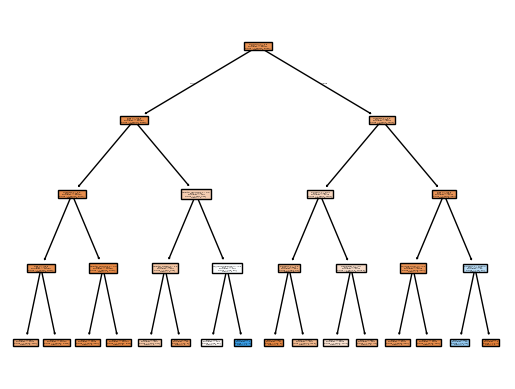

In [37]:
class_names = [str(label) for label in dt_model.classes_]
#plt.figure(figsize=(15,10))#
tree.plot_tree(dt_model,
               feature_names=features,
               class_names=class_names,
               filled=True)
plt.show()

### Interpretation:

The decision tree predicts conversion using features like 'job,' 'marital,'education,' 'default', ' housing,' 'loan,' 'contact,' 'month. Visualization reveals how the model splits data at each node, highlighting key decision factors.

  ### 4.a.  Demonstrate how to conduct product analytics in R, specifically generating time series trends for the variables 'Number of orders' and 'Total revenue,' using the dataset 'online_Retail.xlsx'      


In [38]:
online_df = pd.read_excel('D:/PYTHON/DATA SCIENCE/DATA/Online Retail.xlsx')

In [40]:

online_df.columns


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [62]:
online_df['InvoiceDate'] = pd.to_datetime(online_df['InvoiceDate'])
online_df['TotalRevenue'] = online_df['UnitPrice'] * online_df['Quantity']


In [63]:
online_df['Date'] = online_df['InvoiceDate'].dt.date
daily_sales = online_df.groupby('Date').agg(
    NumberOfOrders=('InvoiceNo', 'nunique'), 
    TotalRevenue=('TotalRevenue', 'sum')  
).reset_index()


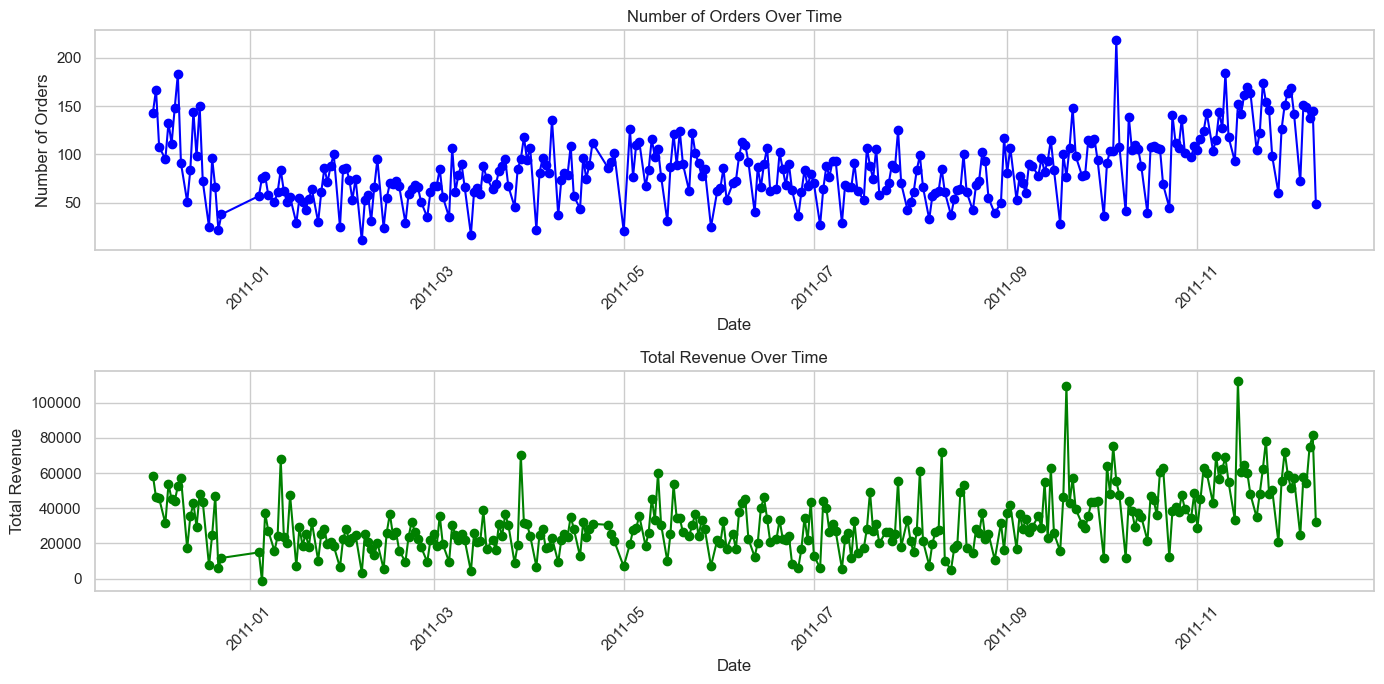

In [46]:
sns.set(style='whitegrid')


plt.figure(figsize=(14, 7))


plt.subplot(2, 1, 1)
plt.plot(daily_sales['Date'], daily_sales['NumberOfOrders'], color='blue', marker='o')
plt.title('Number of Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)


plt.subplot(2, 1, 2)
plt.plot(daily_sales['Date'], daily_sales['TotalRevenue'], color='green', marker='o')
plt.title('Total Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)


plt.tight_layout()


plt.show()


### 5. a Using the dataset named "online_Retail.csv," implement a user-based collaborative filtering recommendation system and provide recommendation for the customer “14567.0” in Python. Comment on your findings.


In [48]:
retail_df = pd.read_excel("D:/PYTHON/DATA SCIENCE/DATA/Online Retail.xlsx")

In [50]:
retail_df = retail_df[(retail_df['Quantity'] > 0) & (retail_df['UnitPrice'] > 0)]
retail_df = retail_df.dropna(subset=['CustomerID'])
retail_df['CustomerID'].isna().sum()
retail_df.shape

(397884, 8)

In [51]:
customer_item_matrix = retail_df.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', aggfunc='sum')
customer_item_matrix

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
12349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
12350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18281.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
customer_item_matrix = customer_item_matrix.applymap(lambda x: 1 if x > 0 else 0)
customer_item_matrix

C:\Users\AJITH N\AppData\Local\Temp\ipykernel_9008\3723262966.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  customer_item_matrix = customer_item_matrix.applymap(lambda x: 1 if x > 0 else 0)


StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18281.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18282.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
user_to_user_sim_matrix = pd.DataFrame(cosine_similarity(customer_item_matrix), 
                                 index=customer_item_matrix.index, 
                                 columns=customer_item_matrix.index)

In [56]:
user_to_user_sim_matrix.head()

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.063022,0.046130,0.047795,0.038484,0.0,0.025876,0.136641,0.094742,...,0.0,0.029709,0.052668,0.0,0.032844,0.062318,0.0,0.113776,0.109364,0.012828
12348.0,0.0,0.063022,1.000000,0.024953,0.051709,0.027756,0.0,0.027995,0.118262,0.146427,...,0.0,0.064282,0.113961,0.0,0.000000,0.000000,0.0,0.000000,0.170905,0.083269
12349.0,0.0,0.046130,0.024953,1.000000,0.056773,0.137137,0.0,0.030737,0.032461,0.144692,...,0.0,0.105868,0.000000,0.0,0.039014,0.000000,0.0,0.067574,0.137124,0.030475
12350.0,0.0,0.047795,0.051709,0.056773,1.000000,0.031575,0.0,0.000000,0.000000,0.033315,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044866,0.000000


In [57]:
user_to_user_sim_matrix.columns = customer_item_matrix.index
user_to_user_sim_matrix.index = customer_item_matrix.index
user_to_user_sim_matrix

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.063022,0.046130,0.047795,0.038484,0.0,0.025876,0.136641,0.094742,...,0.0,0.029709,0.052668,0.000000,0.032844,0.062318,0.000000,0.113776,0.109364,0.012828
12348.0,0.0,0.063022,1.000000,0.024953,0.051709,0.027756,0.0,0.027995,0.118262,0.146427,...,0.0,0.064282,0.113961,0.000000,0.000000,0.000000,0.000000,0.000000,0.170905,0.083269
12349.0,0.0,0.046130,0.024953,1.000000,0.056773,0.137137,0.0,0.030737,0.032461,0.144692,...,0.0,0.105868,0.000000,0.000000,0.039014,0.000000,0.000000,0.067574,0.137124,0.030475
12350.0,0.0,0.047795,0.051709,0.056773,1.000000,0.031575,0.0,0.000000,0.000000,0.033315,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044866,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0.0,0.062318,0.000000,0.000000,0.000000,0.000000,0.0,0.041523,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.105409,1.000000,0.119523,0.000000,0.000000,0.000000
18281.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.049629,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.119523,1.000000,0.000000,0.046613,0.000000
18282.0,0.0,0.113776,0.000000,0.067574,0.000000,0.037582,0.0,0.000000,0.160128,0.079305,...,0.0,0.174078,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.017800,0.000000


In [58]:
user_to_user_sim_matrix.loc[14567.0].sort_values(ascending=False)

CustomerID
14567.0    1.000000
14937.0    1.000000
17173.0    0.899401
18167.0    0.852803
13177.0    0.633300
             ...   
18193.0    0.000000
14790.0    0.000000
14792.0    0.000000
18200.0    0.000000
18268.0    0.000000
Name: 14567.0, Length: 4338, dtype: float64

In [59]:
item_bought_A = set(customer_item_matrix.columns[customer_item_matrix.loc[14567.0].to_numpy().nonzero()])
item_bought_A

{20914,
 20969,
 20970,
 20971,
 20972,
 21216,
 21218,
 21531,
 21533,
 21539,
 21843,
 21844,
 22070,
 22141,
 22142,
 22144,
 22147,
 22150,
 22271,
 22273,
 22274,
 22568,
 22637,
 22749,
 22750,
 22751,
 22795,
 22940,
 23126,
 23127,
 23128,
 85066,
 '85123A'}

In [60]:
item_bought_by_B = set(customer_item_matrix.columns[customer_item_matrix.loc[14937.0].to_numpy().nonzero()])
item_bought_by_B

{20914,
 20969,
 20970,
 20971,
 20972,
 21216,
 21218,
 21531,
 21533,
 21539,
 21843,
 21844,
 22070,
 22141,
 22142,
 22144,
 22147,
 22150,
 22271,
 22273,
 22274,
 22568,
 22637,
 22749,
 22750,
 22751,
 22795,
 22940,
 23126,
 23127,
 23128,
 85066,
 '85123A'}

In [61]:
recommendation = item_bought_A-item_bought_by_B
recommendation

set()